In [2]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [3]:
# Importar el data set
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [7]:
print(X)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


numpy.ndarray

In [8]:
type(X)
type(y)

numpy.ndarray

In [29]:
dataset.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [31]:
# Ajustar la regresión lineal con el dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [32]:
dataset.describe()

Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000

## EDA (Análisis Exploratorio de Datos)

Text(0.5, 0, 'Position')

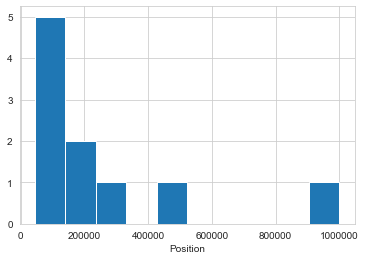

In [33]:
sns.set_style('whitegrid')
dataset['Salary'].hist()
plt.xlabel('Position')

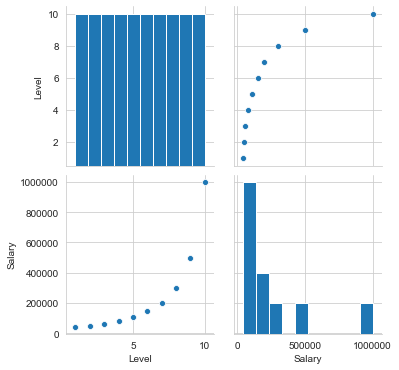

In [34]:
sns.pairplot(dataset,palette='Set1')

Text(0, 0.5, 'Frecuencia por posición')

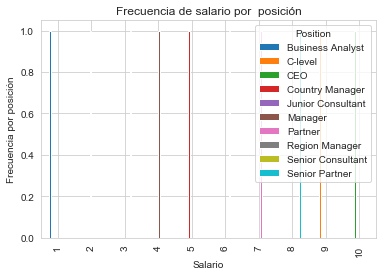

In [35]:
%matplotlib inline
pd.crosstab(dataset.Level, dataset.Position).plot(kind="bar")
plt.title("Frecuencia de salario por  posición")
plt.xlabel("Salario")
plt.ylabel("Frecuencia por posición")

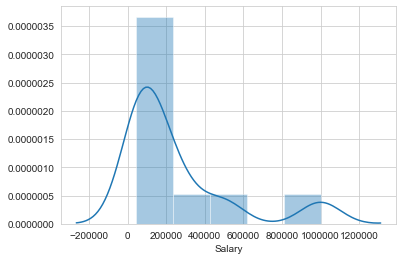

In [36]:
sns.distplot(dataset['Salary'])

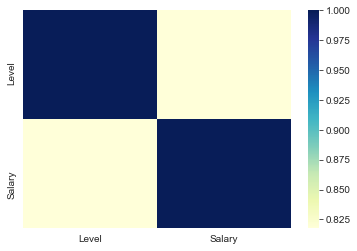

In [37]:
sns.heatmap(dataset.corr(),cmap="YlGnBu")

## Ajustar la regresión polinómica con el dataset

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualización de los resultados del Modelo Lineal

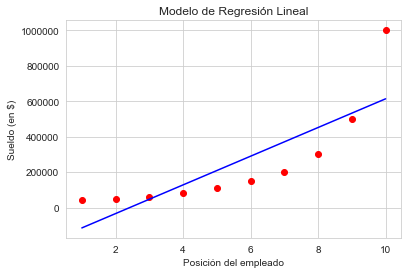

In [39]:
# Visualización de los resultados del Modelo Lineal
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

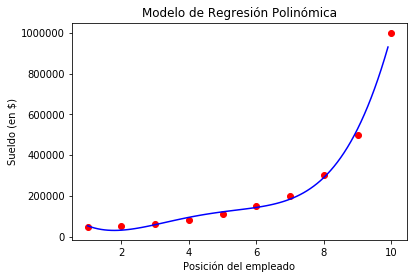

In [8]:
# Visualización de los resultados del Modelo Polinómico
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Modelo de Regresión Polinómica")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [42]:
# Predicción de nuestros modelos
# Se ha añadido la sintaxis de doble corchete necesaria para hacer la predicción en las últimas versiones de Python (3.7+)
print('Regresión Lineal:',lin_reg.predict([[6.5]]))
print('Regresión Polinomial:',lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))

Regresión Lineal: [330378.78787879]
Regresión Polinomial: [158862.45265153]
